In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris

np.random.seed(121)
tf.random.set_seed(121)

dataset = load_iris()
print(dataset.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
df = pd.DataFrame(data=dataset.data,
                  #columns=dataset.feature_names
                  columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
                  )
df["target"] = dataset.target
print(df.head())
print(df.info())
print(df.shape)
X = df.iloc[: , :-1]
y = df.iloc[: , -1]


   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None
(150, 5)


In [14]:
# oh = OneHotEncoder()
# y_oh = oh.fit_transform(y_enc.reshape(-1,1))

y_oh = to_categorical(y) #원핫인코딩 010 101

## model

In [25]:
model = Sequential()
model.add(Dense(units = 128, input_dim = 4, activation = 'relu'))
model.add(Dense(units = 64,                activation = 'relu'))
model.add(Dense(units = 16,               activation = 'relu'))
model.add(Dense(units = 3,                activation = 'softmax'))
# lom
model.compile(loss ='categorical_crossentropy', 
              optimizer ='adam', 
              metrics = ['accuracy'])

model.fit(X, y_oh, epochs =300)
evaluation = model.evaluate(X, y_oh)
print(f'loss: {evaluation[0]}, accuracy: {evaluation[1]}')

Epoch 1/300
5/5 [==============================] - 5s 9ms/step - loss: 1.1127 - accuracy: 0.4388
Epoch 2/300
5/5 [==============================] - 0s 10ms/step - loss: 0.9527 - accuracy: 0.3561
Epoch 3/300
5/5 [==============================] - 0s 8ms/step - loss: 0.8879 - accuracy: 0.6707
Epoch 4/300
5/5 [==============================] - 0s 28ms/step - loss: 0.7958 - accuracy: 0.8241
Epoch 5/300
5/5 [==============================] - 0s 5ms/step - loss: 0.7202 - accuracy: 0.8718
Epoch 6/300
5/5 [==============================] - ETA: 0s - loss: 0.6692 - accuracy: 0.81 - 0s 14ms/step - loss: 0.6672 - accuracy: 0.8180
Epoch 7/300
5/5 [==============================] - 0s 14ms/step - loss: 0.6125 - accuracy: 0.8737
Epoch 8/300
5/5 [==============================] - 0s 17ms/step - loss: 0.5355 - accuracy: 0.9540
Epoch 9/300
5/5 [==============================] - 0s 6ms/step - loss: 0.4984 - accuracy: 0.8453
Epoch 10/300
5/5 [==============================] - 0s 5ms/step - loss: 0.4388 -

5/5 [==============================] - 0s 24ms/step - loss: 0.0352 - accuracy: 0.9907
Epoch 165/300
5/5 [==============================] - 0s 4ms/step - loss: 0.0586 - accuracy: 0.9720
Epoch 166/300
5/5 [==============================] - 0s 25ms/step - loss: 0.0823 - accuracy: 0.9686
Epoch 167/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0479 - accuracy: 0.9847
Epoch 168/300
5/5 [==============================] - 0s 9ms/step - loss: 0.0471 - accuracy: 0.9895
Epoch 169/300
5/5 [==============================] - 0s 5ms/step - loss: 0.0524 - accuracy: 0.9877
Epoch 170/300
5/5 [==============================] - 0s 7ms/step - loss: 0.0588 - accuracy: 0.9649
Epoch 171/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0921 - accuracy: 0.9720
Epoch 172/300
5/5 [==============================] - 0s 7ms/step - loss: 0.0533 - accuracy: 0.9764
Epoch 173/300
5/5 [==============================] - ETA: 0s - loss: 0.1027 - accuracy: 0.95 - 0s 28ms/step - loss: 0.100

## train, val split

### (1) keras.validation_split

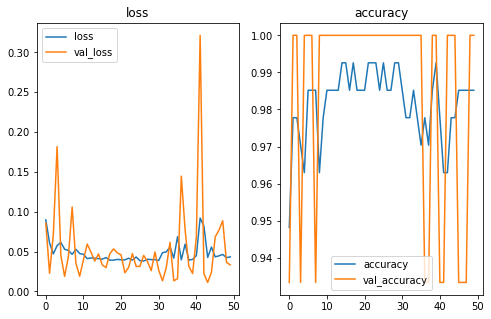

In [44]:
# 120 학습데이터셋 (9:1) 108학습 12 내부적모델 검증

res= model.fit(X, y_oh, epochs =50, validation_split = 0.1)
plt.figure(figsize = (8,5))
plt.subplot(1,2,1)
plt.plot(res.history['loss'], label='loss')
plt.plot(res.history['val_loss'], label='val_loss')
plt.legend()
plt.title('loss')
plt.subplot(1,2,2)
plt.plot(res.history['accuracy'], label='accuracy')
plt.plot(res.history['val_accuracy'], label='val_accuracy')
plt.title('accuracy')
plt.legend()
plt.show()


### (2) sklearn.train_test_split 

In [54]:
X_train,X_val, y_train, y_val = train_test_split(X, y_oh, test_size=0.2, random_state=160)

# model.fit(X, y_oh, epochs =300)
proba= model.predict(X_val)
print(proba)

pred=np.argmax(proba, axis=1)
print(pred)
print(y_val)

evaluation = model.evaluate(X, y_oh)
print(f'loss: {evaluation[0]}, accuracy: {evaluation[1]}')

[[1.0000000e+00 3.7206531e-09 4.0952382e-29]
 [1.0000000e+00 5.6256771e-10 2.4086684e-30]
 [1.0000000e+00 2.0142012e-10 1.3965579e-31]
 [3.5152431e-07 9.9999964e-01 4.3889833e-10]
 [3.2265855e-06 9.9999499e-01 1.7712362e-06]
 [1.0000000e+00 1.3114565e-09 5.2870493e-30]
 [2.0824627e-06 1.3204619e-02 9.8679322e-01]
 [1.3775784e-04 5.2930737e-01 4.7055489e-01]
 [2.6455625e-06 1.3404254e-02 9.8659307e-01]
 [1.0000000e+00 9.7940597e-12 1.0141438e-32]
 [4.5834408e-06 3.3470694e-02 9.6652472e-01]
 [8.0261748e-07 2.9937357e-03 9.9700552e-01]
 [1.0000000e+00 1.2092839e-09 2.3690211e-29]
 [1.4896575e-06 1.1029162e-02 9.8896933e-01]
 [1.0000000e+00 1.3151721e-08 1.3303372e-27]
 [1.1977196e-06 9.9999881e-01 8.3870454e-12]
 [1.0000000e+00 2.6104185e-08 4.8181066e-28]
 [1.3712781e-06 5.6284796e-03 9.9437016e-01]
 [4.6193480e-05 1.7139745e-01 8.2855636e-01]
 [1.5126391e-08 4.2750363e-04 9.9957246e-01]
 [1.0000000e+00 4.1051001e-10 7.5813513e-31]
 [1.0000000e+00 1.0242662e-09 6.7770623e-30]
 [1.155805

In [56]:
model.fit(X, y_oh, epochs = 300,
          validation_data= (X_val,y_val))

Epoch 1/300
5/5 [==============================] - 1s 220ms/step - loss: 0.0564 - accuracy: 0.9667 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 2/300
5/5 [==============================] - 0s 41ms/step - loss: 0.0487 - accuracy: 0.9733 - val_loss: 0.0303 - val_accuracy: 1.0000
Epoch 3/300
5/5 [==============================] - 0s 65ms/step - loss: 0.0457 - accuracy: 0.9800 - val_loss: 0.0178 - val_accuracy: 1.0000
Epoch 4/300
5/5 [==============================] - 0s 53ms/step - loss: 0.0314 - accuracy: 0.9933 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 5/300
5/5 [==============================] - 0s 36ms/step - loss: 0.0355 - accuracy: 0.9867 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 6/300
5/5 [==============================] - 0s 39ms/step - loss: 0.0350 - accuracy: 0.9933 - val_loss: 0.0116 - val_accuracy: 1.0000
Epoch 7/300
5/5 [==============================] - 0s 43ms/step - loss: 0.0340 - accuracy: 0.9933 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 8/300
5/5 [==

5/5 [==============================] - 0s 50ms/step - loss: 0.0280 - accuracy: 0.9933 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 118/300
5/5 [==============================] - 0s 40ms/step - loss: 0.0291 - accuracy: 0.9933 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 119/300
5/5 [==============================] - 0s 37ms/step - loss: 0.0283 - accuracy: 0.9933 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 120/300
5/5 [==============================] - 0s 38ms/step - loss: 0.0295 - accuracy: 0.9933 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 121/300
5/5 [==============================] - 0s 38ms/step - loss: 0.0288 - accuracy: 0.9933 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 122/300
5/5 [==============================] - 0s 35ms/step - loss: 0.0273 - accuracy: 0.9933 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 123/300
5/5 [==============================] - 0s 29ms/step - loss: 0.0283 - accuracy: 0.9933 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 124/300
5/5 [=

Epoch 175/300
5/5 [==============================] - 0s 38ms/step - loss: 0.0303 - accuracy: 0.9867 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 176/300
5/5 [==============================] - 0s 38ms/step - loss: 0.0350 - accuracy: 0.9933 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 177/300
5/5 [==============================] - 0s 34ms/step - loss: 0.0335 - accuracy: 0.9867 - val_loss: 0.0253 - val_accuracy: 1.0000
Epoch 178/300
5/5 [==============================] - 0s 35ms/step - loss: 0.0275 - accuracy: 0.9867 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 179/300
5/5 [==============================] - 0s 25ms/step - loss: 0.0367 - accuracy: 0.9867 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 180/300
5/5 [==============================] - 0s 27ms/step - loss: 0.0347 - accuracy: 0.9933 - val_loss: 0.0329 - val_accuracy: 0.9667
Epoch 181/300
5/5 [==============================] - 0s 33ms/step - loss: 0.0396 - accuracy: 0.9733 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 

Epoch 233/300
5/5 [==============================] - 0s 32ms/step - loss: 0.0267 - accuracy: 0.9933 - val_loss: 0.0172 - val_accuracy: 1.0000
Epoch 234/300
5/5 [==============================] - 0s 31ms/step - loss: 0.0293 - accuracy: 0.9933 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 235/300
5/5 [==============================] - 0s 26ms/step - loss: 0.0290 - accuracy: 0.9933 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 236/300
5/5 [==============================] - 0s 31ms/step - loss: 0.0251 - accuracy: 0.9933 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 237/300
5/5 [==============================] - 0s 29ms/step - loss: 0.0274 - accuracy: 0.9933 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 238/300
5/5 [==============================] - 0s 37ms/step - loss: 0.0254 - accuracy: 0.9933 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 239/300
5/5 [==============================] - 0s 30ms/step - loss: 0.0270 - accuracy: 0.9933 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 

Epoch 291/300
5/5 [==============================] - 0s 27ms/step - loss: 0.0273 - accuracy: 0.9933 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 292/300
5/5 [==============================] - 0s 29ms/step - loss: 0.0274 - accuracy: 0.9933 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 293/300
5/5 [==============================] - 0s 31ms/step - loss: 0.0282 - accuracy: 0.9933 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 294/300
5/5 [==============================] - 0s 28ms/step - loss: 0.0275 - accuracy: 0.9933 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 295/300
5/5 [==============================] - 0s 24ms/step - loss: 0.0297 - accuracy: 0.9933 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 296/300
5/5 [==============================] - 0s 25ms/step - loss: 0.0262 - accuracy: 0.9933 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 297/300
5/5 [==============================] - 0s 29ms/step - loss: 0.0308 - accuracy: 0.9867 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 

In [57]:
model.fit(X_train, y_train, epochs = 300)

evaluation = model.evaluate(X_val,y_val)
print(evaluation)

Epoch 1/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0361 - accuracy: 0.9833
Epoch 2/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0468 - accuracy: 0.9833
Epoch 3/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0379 - accuracy: 0.9833
Epoch 4/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0382 - accuracy: 0.9833
Epoch 5/300
4/4 [==============================] - 0s 23ms/step - loss: 0.0328 - accuracy: 0.9917
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9917
Epoch 7/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0318 - accuracy: 0.9917
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0438 - accuracy: 0.9833
Epoch 9/300
4/4 [==============================] - 0s 6ms/step - loss: 0.0337 - accuracy: 0.9917
Epoch 10/300
4/4 [==============================] - 0s 10ms/step - loss: 0.0339 - accuracy: 0.9917
Epoch 11/300
4/4 [=========

4/4 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.9917
Epoch 165/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0327 - accuracy: 0.9917
Epoch 166/300
4/4 [==============================] - 0s 15ms/step - loss: 0.0327 - accuracy: 0.9917
Epoch 167/300
4/4 [==============================] - 0s 4ms/step - loss: 0.0371 - accuracy: 0.9917
Epoch 168/300
4/4 [==============================] - 0s 46ms/step - loss: 0.0334 - accuracy: 0.9917
Epoch 169/300
4/4 [==============================] - 0s 5ms/step - loss: 0.0385 - accuracy: 0.9833
Epoch 170/300
4/4 [==============================] - 0s 31ms/step - loss: 0.0325 - accuracy: 0.9917
Epoch 171/300
4/4 [==============================] - 0s 7ms/step - loss: 0.0337 - accuracy: 0.9917
Epoch 172/300
4/4 [==============================] - 0s 9ms/step - loss: 0.0343 - accuracy: 0.9917
Epoch 173/300
4/4 [==============================] - 0s 8ms/step - loss: 0.0355 - accuracy: 0.9833
Epoch 174/300
4/4 [==